In [12]:
import matplotlib.pyplot as plt
import rioxarray
import numpy as np

In [13]:
def hillshade(array, azimuth=315, angle_altitude=45):
    """Borrow hillshade 
    
    https://github.com/uw-cryo/wv_stereo_processing/blob/54f3e82f313773e57dea8c3af5f05bb69e6b0a68/notebooks/gm_aso_dg_comparison.ipynb"""

    # Source: http://geoexamples.blogspot.com.br/2014/03/shaded-relief-images-using-gdal-python.html

    x, y = np.gradient(array)
    slope = np.pi/2. - np.arctan(np.sqrt(x*x + y*y))
    aspect = np.arctan2(-x, y)
    azimuthrad = azimuth*np.pi / 180.
    altituderad = angle_altitude*np.pi / 180.


    shaded = np.sin(altituderad) * np.sin(slope) \
     + np.cos(altituderad) * np.cos(slope) \
     * np.cos(azimuthrad - aspect)
    return 255*(shaded + 1)/2

In [60]:
initial_dem = rioxarray.open_rasterio("resdepth_datasets/baker_largest_bbox/rd_initial_dem.tif")
print(initial_dem.shape)
print(initial_dem.rio.resolution())

(1, 18210, 10255)
(0.9135309646378489, -0.9135309646378489)


In [61]:
gt_dem = rioxarray.open_rasterio("resdepth_datasets/baker_largest_bbox/rd_gt_dem.tif")
print(gt_dem.shape)
print(gt_dem.rio.resolution())

(1, 18210, 10255)
(0.9135309646378489, -0.9135309646378489)


In [64]:
gt_dem = gt_dem[0,:]#[0,5000:6000,5000:6000]
initial_dem = initial_dem[0,:]#[0,5000:6000,5000:6000]

In [65]:
initial_dem_hs = initial_dem.copy()
initial_dem_hs.data = hillshade(initial_dem)
gt_dem_hs = gt_dem.copy()
gt_dem_hs.data = hillshade(gt_dem)

In [63]:
dem_clim = (min(gt_dem.min(), initial_dem.min()), max(gt_dem.max(), initial_dem.max()))

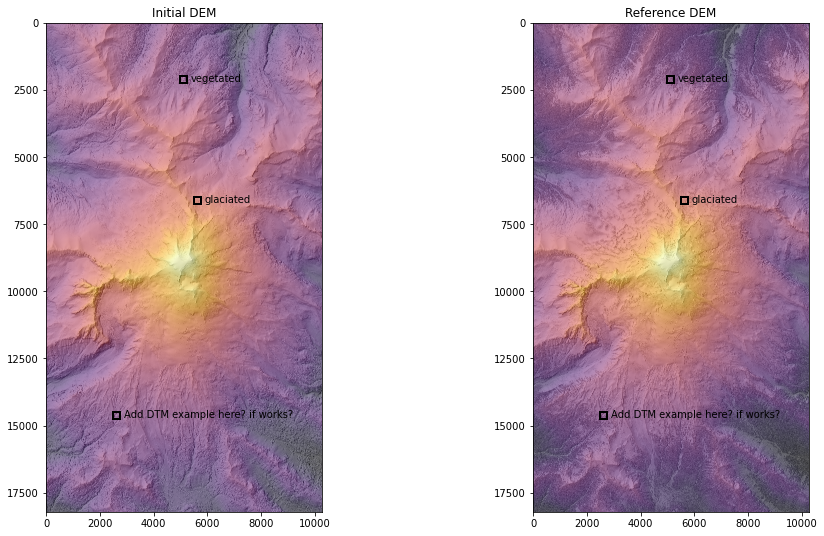

In [83]:
import matplotlib.patches as patches

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,9))
# initial_dem_hs.plot(ax=ax[0], cmap="gray")
# initial_dem.plot(ax=ax[0], cmap="gist_rainbow", clim=dem_clim, alpha=0.6)
# gt_dem_hs.plot(ax=ax[1], cmap="gray")
# gt_dem.plot(ax=ax[1], cmap="gist_rainbow", clim=dem_clim, alpha=0.6)

ax[0].imshow(initial_dem_hs, cmap="gray")
ax[0].imshow(initial_dem, cmap="inferno", clim=dem_clim, alpha=0.5)

ax[1].imshow(gt_dem_hs, cmap="gray")
ax[1].imshow(gt_dem, cmap="inferno", clim=dem_clim, alpha=0.5) # inferno best

ax[0].set_title("Initial DEM")
ax[1].set_title("Reference DEM")


for x,y,name in [(5000,2000,"vegetated"),(5500,6500,"glaciated"),(2500,14500,"Add DTM example here? if works?")]:
    rect = patches.Rectangle((x,y),256,256, linewidth=2, fill=False)
    ax[0].add_patch(rect)
    ax[0].text(x+400,y+200,name)
    rect = patches.Rectangle((x,y),256,256, linewidth=2, fill=False)
    ax[1].add_patch(rect)
    ax[1].text(x+400,y+200,name)
